# Wine Quality Prediction - Complete Machine Learning Tutorial

## Introduction
This notebook demonstrates the complete machine learning workflow using the UCI Wine Quality dataset.
We'll predict wine quality based on physicochemical properties.

## Dataset Information
- **Source**: UCI Machine Learning Repository
- **Problem Type**: Classification/Regression
- **Features**: 11 physicochemical properties
- **Target**: Wine quality (score 0-10)
- **Samples**: ~1600 red wine samples
- **Download**: https://archive.ics.uci.edu/dataset/186/wine+quality
- **Alternative**: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [ ]:
! pip install pandas matplotlib seaborn scikit-learn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## Step 1: Load and Explore the Dataset

In [ ]:
# Load the dataset
# Download from: https://archive.ics.uci.edu/dataset/186/wine+quality
# Or from Kaggle: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print("\n=== FIRST FEW ROWS ===")
data.head()

=== DATASET OVERVIEW ===
Dataset shape: (1599, 12)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

=== FIRST FEW ROWS ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
print("=== DATASET INFO ===")
print(data.info())

print("\n=== STATISTICAL SUMMARY ===")
data.describe()

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

=== STATISTICAL SUMMARY ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Step 2: Data Visualization and Analysis

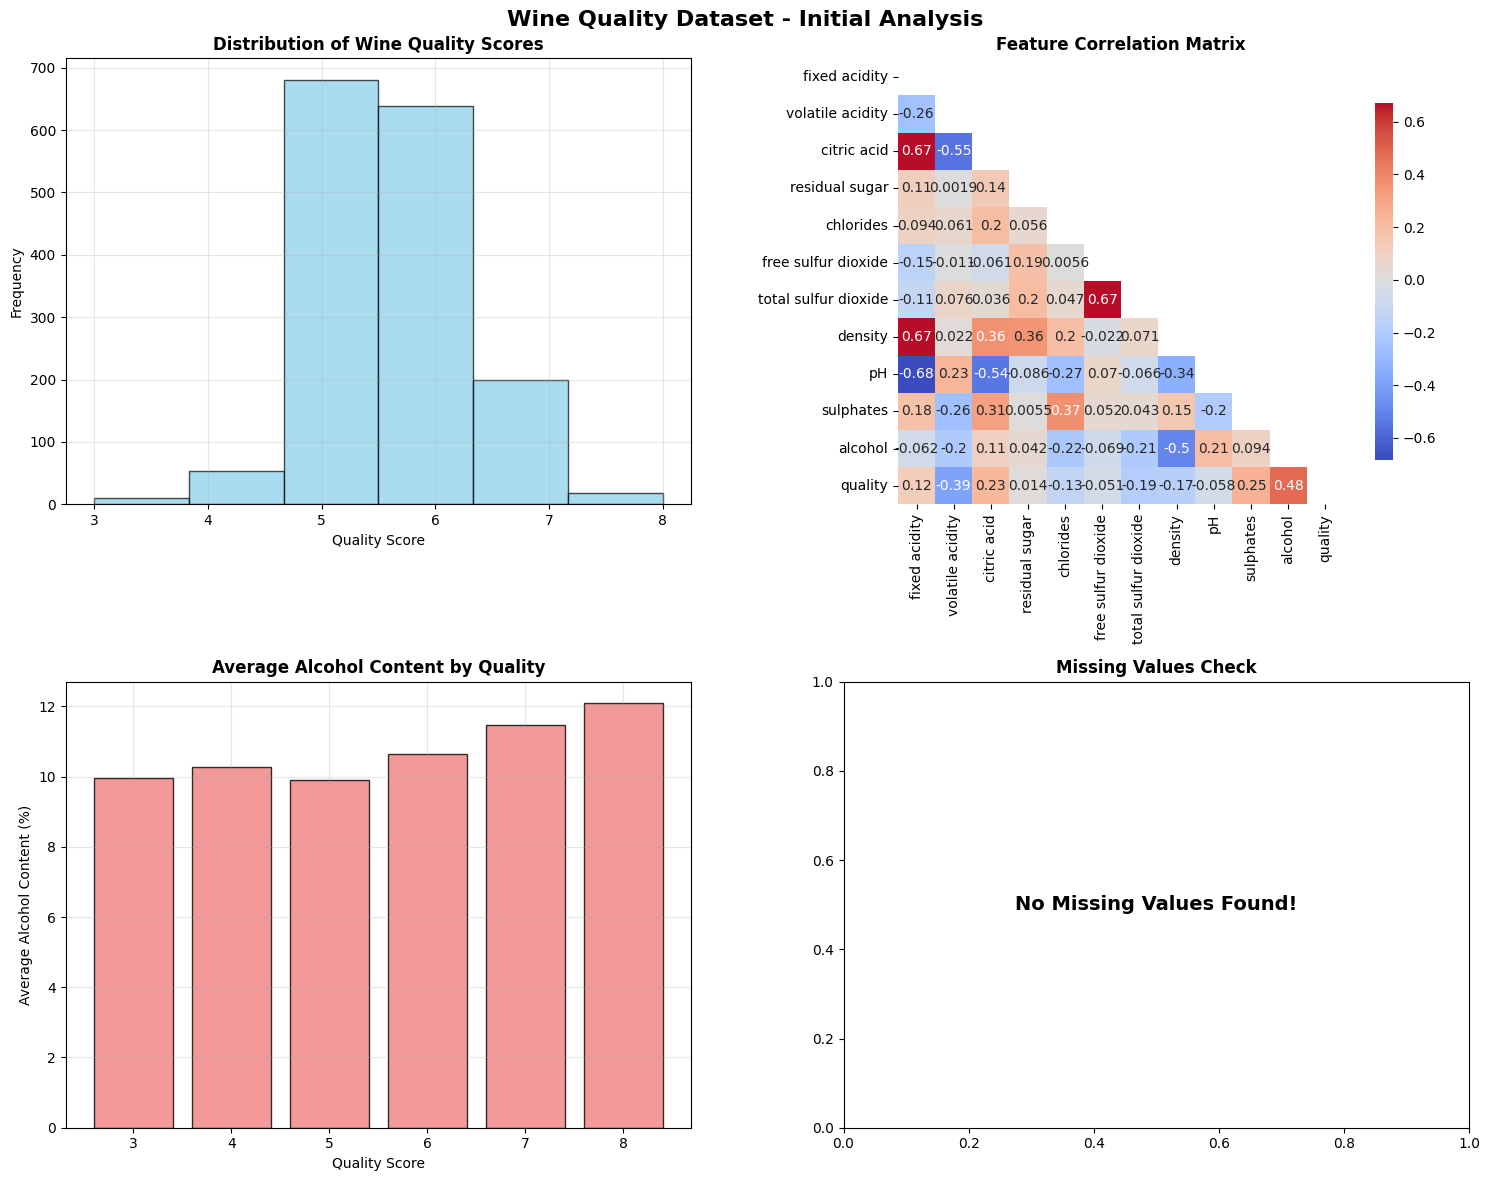

In [ ]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Wine Quality Dataset - Initial Analysis', fontsize=16, fontweight='bold')

# 1. Target variable distribution
axes[0,0].hist(data['quality'], bins=6, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Wine Quality Scores', fontweight='bold')
axes[0,0].set_xlabel('Quality Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. Correlation heatmap
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[0,1], cbar_kws={'shrink': 0.8})
axes[0,1].set_title('Feature Correlation Matrix', fontweight='bold')

# 3. Quality vs Alcohol content
quality_alcohol = data.groupby('quality')['alcohol'].mean()
axes[1,0].bar(quality_alcohol.index, quality_alcohol.values, 
              color='lightcoral', alpha=0.8, edgecolor='black')
axes[1,0].set_title('Average Alcohol Content by Quality', fontweight='bold')
axes[1,0].set_xlabel('Quality Score')
axes[1,0].set_ylabel('Average Alcohol Content (%)')
axes[1,0].grid(True, alpha=0.3)

# 4. Missing values check
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    missing_values[missing_values > 0].plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Missing Values by Feature', fontweight='bold')
else:
    axes[1,1].text(0.5, 0.5, 'No Missing Values Found!', 
                   ha='center', va='center', fontsize=14, fontweight='bold',
                   transform=axes[1,1].transAxes)
    axes[1,1].set_title('Missing Values Check', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
print("\n=== KEY INSIGHTS ===")
print(f"• Most wines have quality scores between 5-6 ({(data['quality'].isin([5,6]).sum()/len(data)*100):.1f}%)")
print(f"• Quality scores range from {data['quality'].min()} to {data['quality'].max()}")
print(f"• Strongest correlations with quality:")
quality_corr = data.corr()['quality'].abs().sort_values(ascending=False)[1:4]
for feature, corr_val in quality_corr.items():
    print(f"  - {feature}: {corr_val:.3f}")


=== KEY INSIGHTS ===
• Most wines have quality scores between 5-6 (82.5%)
• Quality scores range from 3 to 8
• Strongest correlations with quality:
  - alcohol: 0.476
  - volatile acidity: 0.391
  - sulphates: 0.251


## Step 3: Feature Analysis

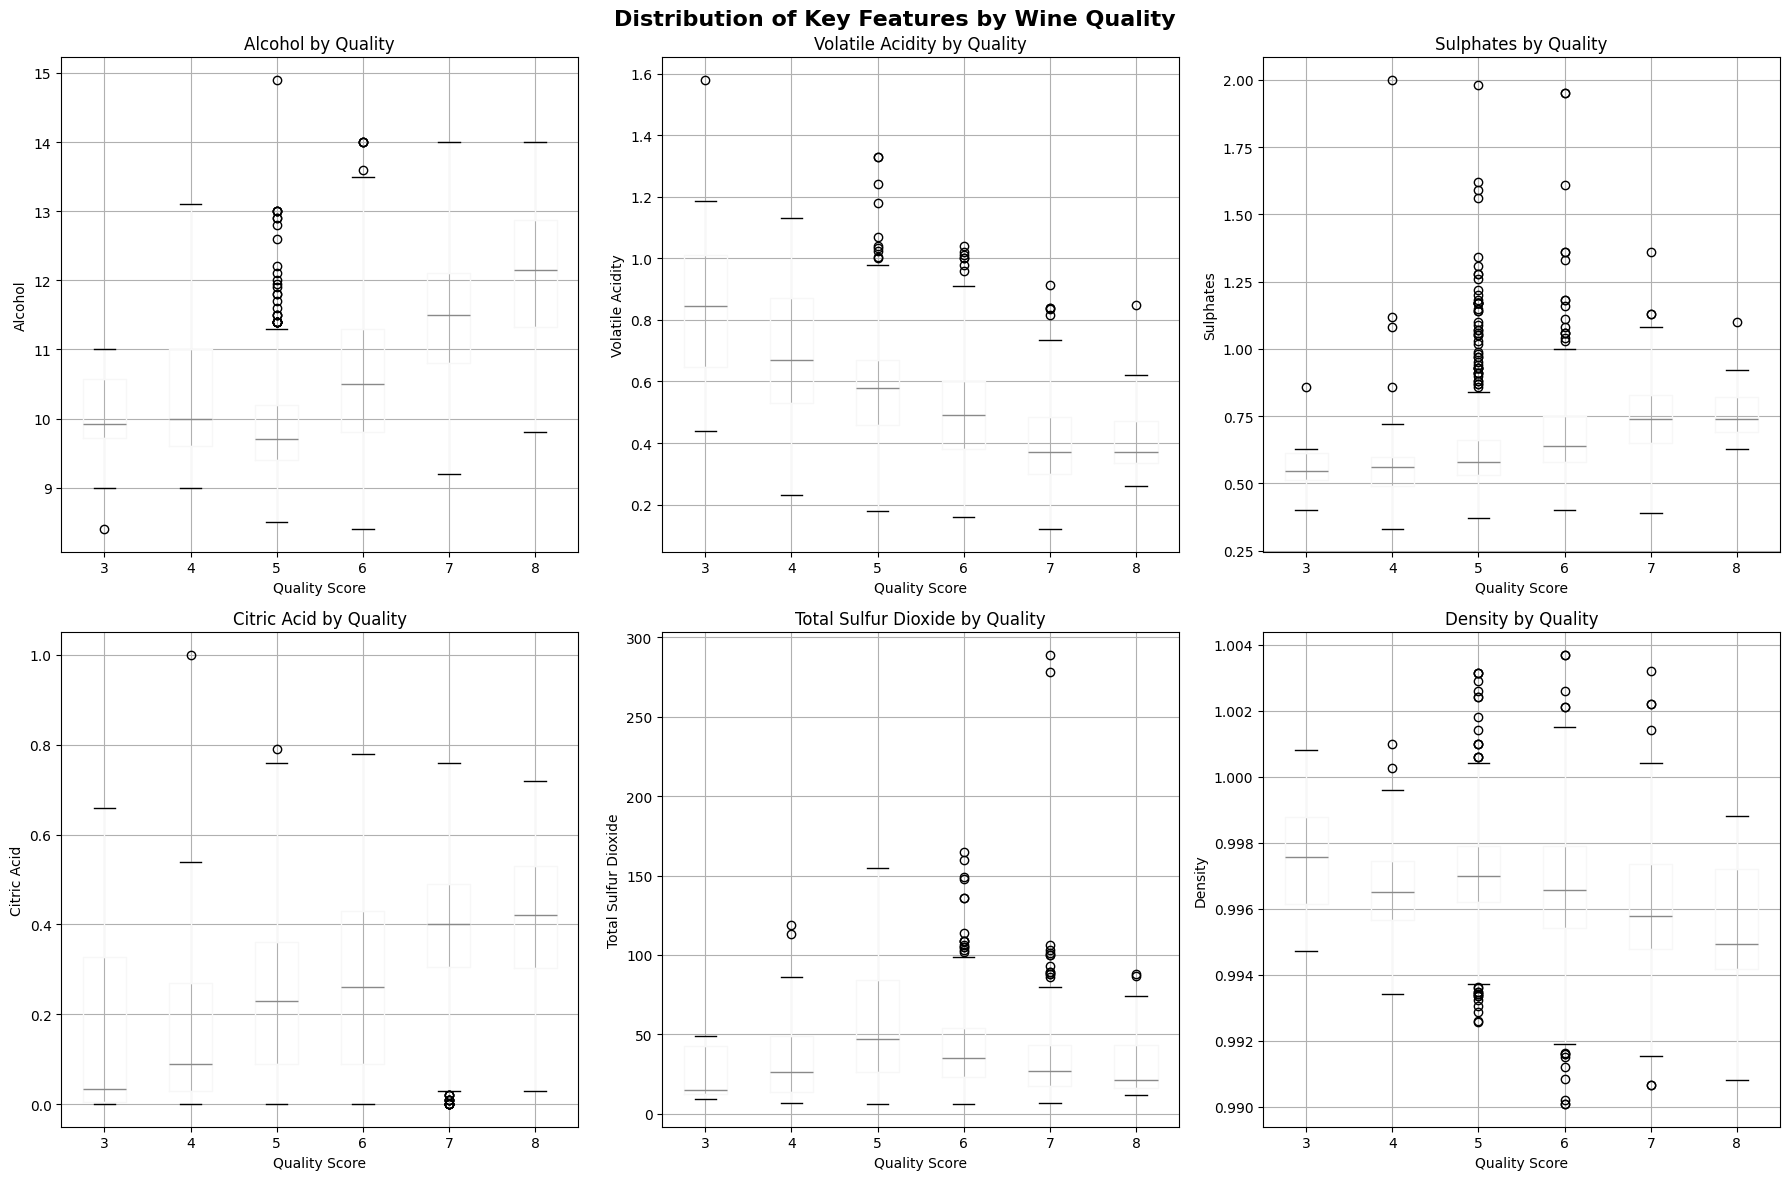

In [6]:
# Analyze top features affecting wine quality
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Key Features vs Wine Quality', fontsize=16, fontweight='bold')

# Get top 6 features correlated with quality
top_features = data.corr()['quality'].abs().sort_values(ascending=False)[1:7].index

for i, feature in enumerate(top_features):
    row = i // 3
    col = i % 3
    
    # Create box plot
    data.boxplot(column=feature, by='quality', ax=axes[row, col])
    axes[row, col].set_title(f'{feature.replace("_", " ").title()} by Quality')
    axes[row, col].set_xlabel('Quality Score')
    axes[row, col].set_ylabel(feature.replace("_", " ").title())

plt.suptitle('Distribution of Key Features by Wine Quality', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 4: Data Preprocessing

In [14]:
print("=== DATA PREPROCESSING ===")

# Separate features and target
X = data.drop('quality', axis=1)
y = data['quality']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# For classification, we'll create quality categories
# Low (3-5), Medium (6), High (7-9)
def categorize_quality(quality):
    if quality <= 5:
        return 'Low'
    elif quality == 6:
        return 'Medium' 
    else:
        return 'High'

y_categorical = y.apply(categorize_quality)

print("\n=== QUALITY CATEGORIES ===")
print(y_categorical.value_counts())

=== DATA PREPROCESSING ===
Features shape: (1599, 11)
Target shape: (1599,)

=== QUALITY CATEGORIES ===
quality
Low       744
Medium    638
High      217
Name: count, dtype: int64


In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y_categorical
)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X, y_categorical, test_size=0.2, random_state=40, stratify=y_categorical
)

X_train_scaled = X_train
X_test_scaled = X_test


# Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_cat_scaled = scaler.transform(X_train_cat)
# X_test_cat_scaled = scaler.transform(X_test_cat)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1279 samples
Test set size: 320 samples


## Step 5: Model Training and Evaluation

### 5.1 Regression Task (Predicting Exact Quality Score)

In [21]:
print("=== REGRESSION MODELS ===")
print("Predicting exact quality scores (3-9)")

# Train regression models
models_reg = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

reg_results = {}

for name, model in models_reg.items():
    print(f"\nTraining {name}...")
    
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    reg_results[name] = {
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }
    
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"Root Mean Squared Error: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")

=== REGRESSION MODELS ===
Predicting exact quality scores (3-9)

Training Random Forest...
Mean Squared Error: 0.416
Root Mean Squared Error: 0.645
R² Score: 0.408

Training Linear Regression...
Mean Squared Error: 0.468
Root Mean Squared Error: 0.684
R² Score: 0.333


### 5.2 Classification Task (Predicting Quality Categories)

In [ ]:
print("=== CLASSIFICATION MODELS ===")
print("Predicting quality categories (Low/Medium/High)")

# Train classification models
models_clf = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

clf_results = {}

for name, model in models_clf.items():
    print(f"\nTraining {name}...")
    
    if name == 'Logistic Regression':
        model.fit(X_train_cat_scaled, y_train_cat)
        y_pred = model.predict(X_test_cat_scaled)
        y_pred_proba = model.predict_proba(X_test_cat_scaled)
    else:
        model.fit(X_train_cat, y_train_cat)
        y_pred = model.predict(X_test_cat)
        y_pred_proba = model.predict_proba(X_test_cat)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_cat, y_pred)
    
    clf_results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy
    }
    
    print(f"Accuracy: {accuracy:.3f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test_cat, y_pred))

## Step 6: Model Performance Visualization

In [ ]:
# Create comprehensive results visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# Regression results comparison
reg_names = list(reg_results.keys())
rmse_scores = [reg_results[name]['rmse'] for name in reg_names]
r2_scores = [reg_results[name]['r2'] for name in reg_names]

axes[0,0].bar(reg_names, rmse_scores, color=['lightblue', 'lightcoral'], alpha=0.8)
axes[0,0].set_title('Regression: RMSE Comparison', fontweight='bold')
axes[0,0].set_ylabel('RMSE')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].bar(reg_names, r2_scores, color=['lightgreen', 'lightyellow'], alpha=0.8)
axes[0,1].set_title('Regression: R² Score Comparison', fontweight='bold')
axes[0,1].set_ylabel('R² Score')
axes[0,1].grid(True, alpha=0.3)

# Actual vs Predicted for best regression model
best_reg_model = min(reg_results.keys(), key=lambda x: reg_results[x]['rmse'])
y_pred_best = reg_results[best_reg_model]['predictions']

axes[0,2].scatter(y_test, y_pred_best, alpha=0.6, color='purple')
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,2].set_xlabel('Actual Quality')
axes[0,2].set_ylabel('Predicted Quality')
axes[0,2].set_title(f'Actual vs Predicted ({best_reg_model})', fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# Classification results
clf_names = list(clf_results.keys())
acc_scores = [clf_results[name]['accuracy'] for name in clf_names]

axes[1,0].bar(clf_names, acc_scores, color=['orange', 'lightpink'], alpha=0.8)
axes[1,0].set_title('Classification: Accuracy Comparison', fontweight='bold')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_ylim(0, 1)
axes[1,0].grid(True, alpha=0.3)

# Confusion matrix for best classification model
best_clf_model = max(clf_results.keys(), key=lambda x: clf_results[x]['accuracy'])
y_pred_best_clf = clf_results[best_clf_model]['predictions']
cm = confusion_matrix(y_test_cat, y_pred_best_clf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,1],
            xticklabels=['High', 'Low', 'Medium'], 
            yticklabels=['High', 'Low', 'Medium'])
axes[1,1].set_title(f'Confusion Matrix ({best_clf_model})', fontweight='bold')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

# Feature importance for Random Forest
if 'Random Forest' in clf_results:
    rf_model = clf_results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    axes[1,2].barh(feature_importance['feature'][:8], feature_importance['importance'][:8])
    axes[1,2].set_title('Feature Importance (Random Forest)', fontweight='bold')
    axes[1,2].set_xlabel('Importance')
    axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Model Interpretation and Insights

In [ ]:
print("=== MODEL PERFORMANCE SUMMARY ===")
print("\nREGRESSION RESULTS:")
for name, results in reg_results.items():
    print(f"• {name}:")
    print(f"  - RMSE: {results['rmse']:.3f} (lower is better)")
    print(f"  - R² Score: {results['r2']:.3f} (higher is better)")

print(f"\nBest Regression Model: {best_reg_model}")

print("\nCLASSIFICATION RESULTS:")
for name, results in clf_results.items():
    print(f"• {name}: {results['accuracy']:.1%} accuracy")

print(f"\nBest Classification Model: {best_clf_model}")

print("\n=== KEY INSIGHTS ===")
print("1. MODEL PERFORMANCE:")
print(f"   • Regression RMSE ~{reg_results[best_reg_model]['rmse']:.2f}: predictions typically off by less than 1 quality point")
print(f"   • Classification accuracy ~{clf_results[best_clf_model]['accuracy']:.1%}: good at categorizing wine quality")

print("\n2. IMPORTANT FEATURES (from Random Forest):")
if 'Random Forest' in clf_results:
    rf_model = clf_results['Random Forest']['model']
    top_features = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False).head(5)
    
    for _, row in top_features.iterrows():
        print(f"   • {row['feature'].replace('_', ' ').title()}: {row['importance']:.3f}")

print("\n3. RECOMMENDATIONS:")
print("   • Random Forest performs well for both tasks")
print("   • Quality prediction is challenging - most wines are average quality")
print("   • Chemical composition significantly affects wine quality")
print("   • Model could be improved with more high/low quality samples")

## Step 8: Making Predictions on New Data

In [ ]:
print("=== MAKING PREDICTIONS ===")

# Example: Predict quality for a new wine sample
new_wine = pd.DataFrame({
    'fixed_acidity': [7.0],
    'volatile_acidity': [0.35],
    'citric_acid': [0.3],
    'residual_sugar': [2.0],
    'chlorides': [0.08],
    'free_sulfur_dioxide': [15.0],
    'total_sulfur_dioxide': [40.0],
    'density': [0.996],
    'pH': [3.2],
    'sulphates': [0.6],
    'alcohol': [11.5]
})

print("New wine sample properties:")
display(new_wine)

# Make predictions with both models
rf_reg = models_reg['Random Forest']
rf_clf = clf_results['Random Forest']['model']

quality_score = rf_reg.predict(new_wine)[0]
quality_category = rf_clf.predict(new_wine)[0]
quality_probabilities = rf_clf.predict_proba(new_wine)[0]

print(f"\nPREDICTIONS:")
print(f"• Predicted Quality Score: {quality_score:.2f}")
print(f"• Predicted Quality Category: {quality_category}")
print(f"• Category Probabilities:")

categories = rf_clf.classes_
for cat, prob in zip(categories, quality_probabilities):
    print(f"  - {cat}: {prob:.2%}")

## Summary

### What We Accomplished
✓ **Data Loading**: Successfully loaded and explored the UCI Wine Quality dataset  
✓ **Data Visualization**: Created informative plots to understand data patterns  
✓ **Data Preprocessing**: Prepared data for machine learning (scaling, splitting)  
✓ **Model Training**: Implemented both regression and classification approaches  
✓ **Model Evaluation**: Used appropriate metrics (RMSE, R², accuracy, confusion matrix)  
✓ **Feature Analysis**: Identified most important features for wine quality  
✓ **Prediction**: Made predictions on new, unseen wine samples  

### Key Takeaways
1. **Random Forest** performed best for both regression and classification tasks
2. **Alcohol content** and **sulphates** are among the most important quality predictors
3. **Most wines** fall into the medium quality category (score 6)
4. **Chemical properties** can predict wine quality with reasonable accuracy

### Next Steps
- Try different algorithms (XGBoost, SVM, Neural Networks)
- Perform hyperparameter tuning using GridSearch or RandomSearch
- Feature engineering (creating new features from existing ones)
- Cross-validation for more robust model evaluation
- Deploy the model as a web application

### Dataset Attribution
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.